# ANÁLISIS "LOAN" - Modelo de Clasificación de REGERSIÓN LOGÍSTICA 

- **DESCRIPCIÓN DE LIBRERIAS UTILIZADAS:**

**VARIABLE OBJETIVO / PREDICTORA:** 
“y”, es el target que busca el banco. La variable dará información si el cliente contrata un depósito a largo plazo o no. Objetivo a predecir

Tipo de variable: Categórica Binaria (Bool). Como es binaria, usamos un modelo de clasificación.

**VARIABLES INDEPENDIENTES:**

**VARIABLES CATEGÓRICAS**
 "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"

Categórica Binaria: "default", "housing","loan"

Categórica Nominal: "job", "maritial", "contact", "month", "day_of_week", "poutcome"

Categórica Ordinal: "educataion"

 **VARIABLES NUMÉRICAS**
"age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.indx", ""cons.conf.indx", "euribor3m", "nr.employed"

De las cuales Continuas:Pueden tomar cualquier valor en un rango ----- USAR MIN-MAX SCALING O Z-COSE SCALING

"age", "duration", "emp.var.rate","cons.price.indx", cons.conf.indx", "euribor3m", "nr.employed"

De las cuales Discretas:Toman valores específicos y contable ----- ANALIZADAS PARA IDENTIFICAR OUTLIERS Y SESGO EN LA DISTRIBUCION

"campaign",  "pdays", "precious"

- **VARIABLES NUMÉRICAS ECONÓMICAS:** Encontramos varias variables que indican datos económicos ("emp.var.rate","cons.price.indx", cons.conf.indx", "euribor3m", "nr.employed") que pueden afectar a la toma de decisoines de los clientes a la hora de querer adquirir un depósito a largo plazo o no. Podríamos categorizarlas como variables económicas: ---- analizar la "multicolinealidad" --- que eeeeeees esooo?


### **PASO 0: IMPORTS**

In [131]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest 

- **DESCRIPCIÓN DEL PROBLEMA**  
    DISMINUCIÓN DE INGRESOS DEL BANCO. ESTE QUIERE OFRECER DEPÓSITOS A LARGO PLAZO PARA RECUPERAR DINERO.
    
    OBJETIVO: Identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo 



- **PROCEDIMIENTOS A SEGUIR:**

- Crear algoritmo de clasificación ?¿?¿?¿?¿ A QUE SE REFIERE ?¿?¿?¿ A un código escrito que se dedica a clasificar datos?¿?¿?¿?

- Si un usuario no se encuentra disponible en un momento dado, entonces se le volverá a llamar de nuevo en otro momento.

- EDA

- CONSTRUIR MODELO DE REGRESIÓN LOGÍSTICA

- OPTIMIZAR EL MODELO

### **PASO 1: LECTURA DE CSV**

In [132]:
ds= pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")
ds.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### **PASO 2: EXPLORACIÓN Y LIMPIEZA DE DATOS**

* Conteo de filas y columnas:

In [133]:
ds.shape

(41188, 21)

* Identificar valores nulos:

In [134]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

    Conclusión: 
    · No se encuentran valores nulos.
    · Tenemos 10 variables numéricas y 11 de tipo object-string

**EXPLORACIÓN DE DATOS**

* Detectar duplicados y contarlos:

In [135]:
ds.duplicated().sum()

np.int64(12)

* Visualizacióon de duplicados:

In [136]:
ds[ds.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


    Conclusión: tenemos 12 filas duplicadas.

    ?¿?¿?¿----- NO ESTOY SEGURA DE QUE LOS DUCPLICADOS QUE MUESTRA SEAN DUPLICADOS REALES -----?¿?¿?¿?¿

**ELIMINAR INFORMACIÓN IRRELEVANTE**

In [137]:
ds.drop(["duration", "month", "day_of_week"], axis = 1 , inplace = True)
ds.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


VARIABLES ELIMINADAS: "duration", "month", "day_of_week""

    Conclusión: Están relacionadas con la llamada al cliente, no aportan gran información relevante a la variable predictora y hay otras columnas que indican información también relacionada con el contacto alcliente y son más relevantes y concretas como ---------------------------------------------------------------------
    --------------------------------------

**VARIABLES NUMÉRICAS**

*   Análisis Var age

FALLO: No resulta el codgo, me da resultados de edad más de 40 no se porque

In [138]:
ds[ds["age"]>23].value_counts()

age  job         marital  education          default  housing  loan  contact    campaign  pdays  previous  poutcome     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
27   admin.      single   high.school        no       no       no    cellular   1         999    0         nonexistent   1.4          93.918          -42.7          4.962      5228.1       no     7
28   services    married  high.school        no       no       no    cellular   1         999    0         nonexistent   1.4          93.918          -42.7          4.962      5228.1       no     7
29   admin.      single   university.degree  no       yes      no    cellular   1         999    0         nonexistent   1.4          93.444          -36.1          4.964      5228.1       no     6
43   housemaid   married  basic.4y           no       yes      no    cellular   1         999    0         nonexistent   1.4          93.918          -42.7          4.962      5228.1       no     6
34   services  

* Análisis Var housing: ¿Tiene hipoteca? (Sí/No)

In [139]:
housing_count= ds[ds["housing"] == "yes"].count()
housing_count

age               21576
job               21576
marital           21576
education         21576
default           21576
housing           21576
loan              21576
contact           21576
campaign          21576
pdays             21576
previous          21576
poutcome          21576
emp.var.rate      21576
cons.price.idx    21576
cons.conf.idx     21576
euribor3m         21576
nr.employed       21576
y                 21576
dtype: int64

In [140]:
print(ds.groupby(["housing", "y"]).size().unstack())

y           no   yes
housing             
no       16596  2026
unknown    883   107
yes      19069  2507


    Conclusión:
    Considerando el gran número de clientes que tienen una hipoteca, comparamos este dato con la predictoria para ver cuántos de ellos Si los clientes tienen una hipoteca es posible que quieran o no pedir un deposito a largo plazo?

* Análisis Var loan: ¿Tiene préstamo personal? (Sí/No)

In [141]:
loan_count= ds[ds["loan"] == "yes"].count()
loan_count

age               6248
job               6248
marital           6248
education         6248
default           6248
housing           6248
loan              6248
contact           6248
campaign          6248
pdays             6248
previous          6248
poutcome          6248
emp.var.rate      6248
cons.price.idx    6248
cons.conf.idx     6248
euribor3m         6248
nr.employed       6248
y                 6248
dtype: int64

In [142]:
print(ds.groupby(["loan", "y"]).size().unstack())

y           no   yes
loan                
no       30100  3850
unknown    883   107
yes       5565   683


    Conclusión: 
    El número de clientes que sí tiene un préstamo y también contrató un deposito son 683, estos clientes seguramente no contratarian la loan.

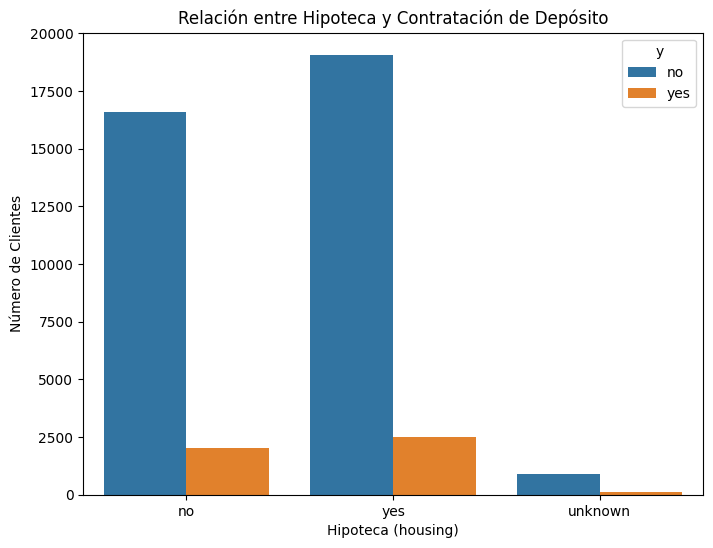

In [143]:
plt.figure(figsize=(8, 6))
sns.countplot(x='housing', hue='y', data=ds)
plt.title('Relación entre Hipoteca y Contratación de Depósito')
plt.xlabel('Hipoteca (housing)')
plt.ylabel('Número de Clientes')
plt.show()


    Conclusión:
    Si los clientes tienen un préstamo personal es posible que quieran o no pedir un deposito a largo plazo?

* Análisis VAr poutcome: Resultado de la campaña anterior ¿¿??¿ CONTRATARON O NO LA LOAN ?¿?¿

In [144]:
ds["poutcome"]

0        nonexistent
1        nonexistent
2        nonexistent
3        nonexistent
4        nonexistent
            ...     
41183    nonexistent
41184    nonexistent
41185    nonexistent
41186    nonexistent
41187        failure
Name: poutcome, Length: 41188, dtype: object

In [145]:
ds[ds["poutcome"] == "nonexistent"].count()

age               35563
job               35563
marital           35563
education         35563
default           35563
housing           35563
loan              35563
contact           35563
campaign          35563
pdays             35563
previous          35563
poutcome          35563
emp.var.rate      35563
cons.price.idx    35563
cons.conf.idx     35563
euribor3m         35563
nr.employed       35563
y                 35563
dtype: int64

In [146]:
ds = ds.drop(ds[ds["poutcome"] == "nonexistent"].index)

In [147]:
print(ds["poutcome"].value_counts())

poutcome
failure    4252
success    1373
Name: count, dtype: int64


In [148]:
ds[ds["poutcome"] == "nonexistent"].count()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

    Conclusión:

* Analisis Var previous

In [149]:
ds[ds["previous"]==0].value_counts()


Series([], Name: count, dtype: int64)

In [150]:
ds[ds["previous"].max()]

KeyError: np.int64(7)

In [ ]:
ds[ds["previous"]== 0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


    De total 41188 clientes  no se han contactado en la campaña anterior 35563. Podrían ser nuevos clientes potenciales

* Análisis Var. campaign: Num contactos realizados en campaña actual

In [ ]:
ds[ds["campaign"]==0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


    Todos los clientes han sido contactados almenos una vez durante la campaña actual

In [ ]:
ds[ds["campaign"]>2].value_counts()

age  job          marital   education            default  housing  loan     contact    month  day_of_week  duration  campaign  pdays  previous  poutcome     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
47   technician   divorced  high.school          no       yes      no       cellular   jul    thu          43        3         999    0         nonexistent   1.4          93.918          -42.7          4.962      5228.1       no     2
35   admin.       married   university.degree    no       yes      no       cellular   may    fri          348       4         999    0         nonexistent  -1.8          92.893          -46.2          1.313      5099.1       no     2
44   blue-collar  married   basic.4y             unknown  no       no       cellular   aug    mon          363       5         999    0         nonexistent   1.4          93.444          -36.1          4.965      5228.1       yes    1
                                                                 

    Se ha contactado solamente a una cuarta parte de los clientes aproximadamente más de una vez

**VARIABLES CATEGÓRICAS**

* Revisar cantidad e categorías en variables categóricas:

In [ ]:
ds = ds[ds["marital"] != "unknown"]

* Analisis Var poutcome

In [ ]:
ds[ds["poutcome"]== "nonexistent"].value_counts()

age  job           marital   education            default  housing  loan  contact    month  day_of_week  duration  campaign  pdays  previous  poutcome     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
47   technician    divorced  high.school          no       yes      no    cellular   jul    thu          43        3         999    0         nonexistent   1.4          93.918          -42.7          4.962      5228.1       no     2
32   technician    single    professional.course  no       yes      no    cellular   jul    thu          128       1         999    0         nonexistent   1.4          93.918          -42.7          4.968      5228.1       no     2
24   services      single    high.school          no       yes      no    cellular   apr    tue          114       1         999    0         nonexistent  -1.8          93.075          -47.1          1.423      5099.1       no     2
55   services      married   high.school          unknown  no       no   

* Analisis Var housing

* Analisis Var loan

**LIMPIEZA DE DATOS IRRELEVANTES**

ELEGIR 
VARIABLES ELIMINADAS: 
VARIABLES ESCOGIDASD PARA EL ANÁLISIS:

    Conclusión:

### **PASO 3: ANÁLISIS DE VARIABLES UNIVARIANTE**

##### **ANÁLISIS DE VARIABLES UNIVARIANTE**

**HISTOGRAMAS Y BOXPLOTS DE VARIABLES CATEGÓRICAS**

VARIABLES CATEGÓRICAS: "job", "marital", "education", "default", "housing", "loan", "contact", "poutcome"

y           no  yes
marital            
divorced   478  153
married   2300  807
single    1334  535


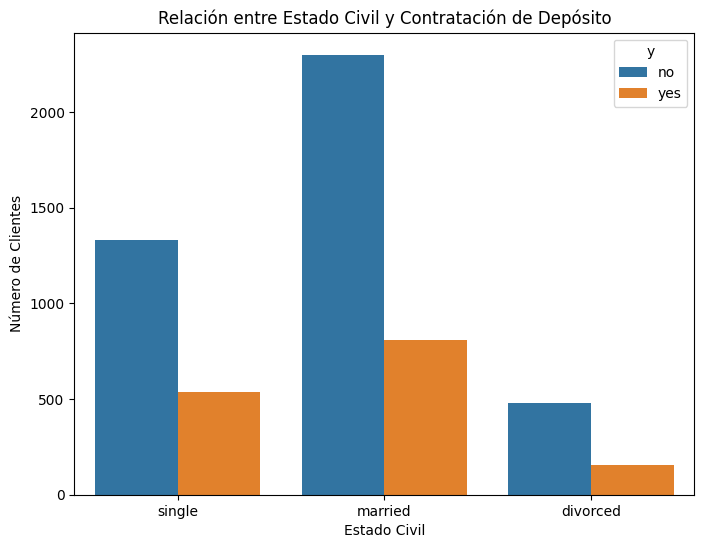

In [ ]:
marital_deposit = ds.groupby(['marital', 'y']).size().unstack()
print(marital_deposit)

plt.figure(figsize=(8, 6))
sns.countplot(x='marital', hue='y', data=ds)
plt.title('Relación entre Estado Civil y Contratación de Depósito')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.show()

* Conteo de freceuncia en variables categóricas: ¿?¿?¿?¿?¿?¿?¿?¿?¿?¿?

In [ ]:
fig, axis = plt.subplots(1,2, figsize = (15, 10))

plot1=sns.histplot(ax = axis[0], data = total_data, x = "neighbourhood_group").set(xlabel = " By Neighbourhood Group")

plot3=sns.histplot(ax = axis[1], data = total_data, x = "room_type").set(xlabel = "By Room type")

plt.tight_layout()
plt.grid(True, linestyle = '--')
plt.show()

    Conclusión:

- **HISTOGRAMAS Y BOXPLOTS DE VARIABLES NUMÉRICAS**

 VARIABLES NUMÉRICAS:
"age", "campaign", "pdays", "previous"

* Histogramas y Boxplots

In [ ]:
fig, axis = plt.subplots(3, 2, figsize = (13, 10))

sns.histplot(ax = axis[0, 0], data = total_data, x = "Survived").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0, 1], data = total_data, x = "Sex").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = total_data, x = "Pclass").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = total_data, x = "Embarked")
sns.histplot(ax = axis[1, 1], data = total_data, x = "SibSp").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = total_data, x = "Parch").set(ylabel = None)


sns.boxplot(ax = axis[0, 1], data = total_data, x = "price").set(xlabel = "Variable Predictoria - Price")

sns.boxplot(ax = axis[1, 0], data = total_data, x = "minimum_nights").set(xlabel = "Minimum_nights")

sns.boxplot(ax = axis[1, 1], data = total_data, x = "latitude").set(xlabel = "Latitude")

sns.boxplot(ax = axis[2, 0], data = total_data, x = "longitude").set(xlabel = "Longitude")

sns.boxplot(ax = axis[2, 1], data = total_data, x = "availability_365").set(xlabel = "Availability_365")

plt.tight_layout()

plt.show()

    Conclusión:

- **VISUAL AMPLIADO DE HISTOGRAMAS Y FBDBGSRNGFBFGS_GRÁFICOS DE CAJAS_KJVBLKFSDVJBFABJVFN**

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (10, 7))

sns.histplot(ax = axis[0], data = total_data[total_data["minimum_nights"]<200], x = "minimum_nights").set(xlabel = "Minimum_nights")
sns.boxplot(ax = axis[1], data = total_data[total_data["minimum_nights"]<200], x = "minimum_nights")

    Conclusión:

- **LIMPIEZA DE DATOS?¿AÑADIR?¿**

In [ ]:
total_data.loc[(total_data["availability_365"]==0) | (total_data["availability_365"]>365)]

In [ ]:
total_data = total_data[total_data["availability_365"] != 0]

#EN EL CASO DE QUE AÑADAS MÁS ANÁLISIS Y LIMPIEZA DE DATOS REPRESENTA LOS PLOTS TAMBIÉN

### **PASO 4: ANÁLISIS DE VARIABLES MULTIVARIANTE**

**VARIABLES CATEGÓRICAS**
 "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"
 

 **VARIABLES NUMÉRICAS**
"age", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.indx", ""cons.conf.indx", "euribor3m", "nr.employed"

##### **ANÁLISIS DE VARIABLES MULTIVARIANTE**

In [ ]:
ds["y_numeric"] = ds["y"].map({"yes": 1, "no": 0})

- **ANÁLISIS NUMÉRICO-NUMÉRICO**

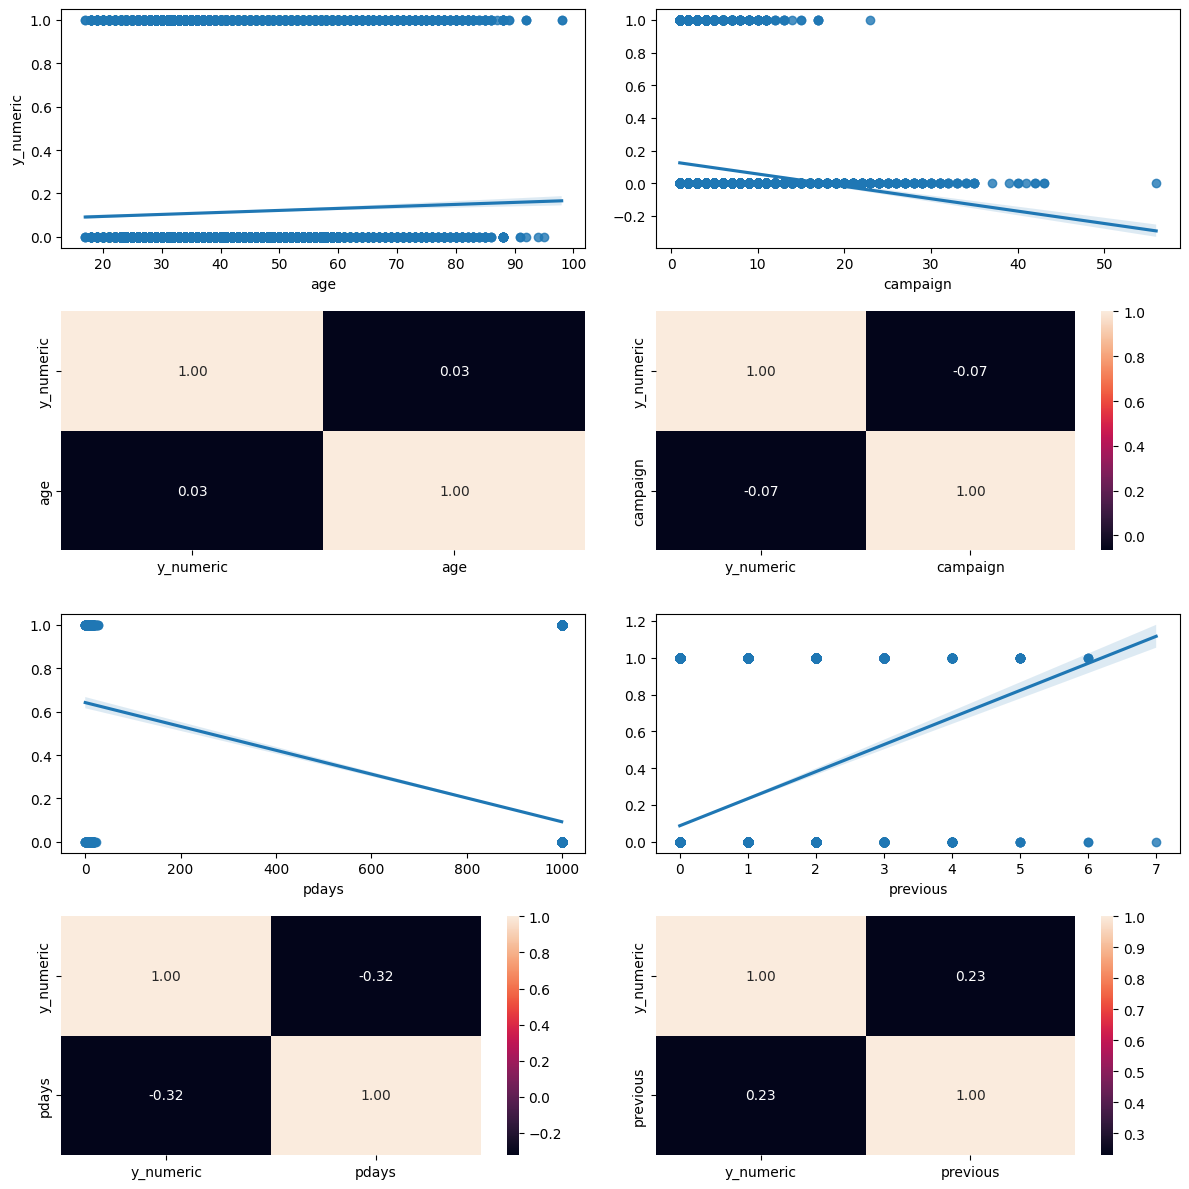

In [ ]:
fig, axis = plt.subplots(4, 2, figsize = (12, 12))


sns.regplot(ax = axis[0, 0], data = ds, x = "age", y = "y_numeric")
sns.heatmap(ds[["y_numeric", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = ds, x = "campaign", y = "y_numeric").set(ylabel=None)
sns.heatmap(ds[["y_numeric", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = ds, x = "pdays", y = "y_numeric").set(ylabel=None)
sns.heatmap(ds[["y_numeric", "pdays"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = ds, x = "previous", y = "y_numeric").set(ylabel=None)
sns.heatmap(ds[["y_numeric", "previous"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])


plt.tight_layout()

plt.show()

- **COORRELACIONES ENTRE VARIABLES NUMÉRICAS ECONÓMICAS Y LA VARIABLE PREDICTORA**

VARIABLES NUMÉRICAS ECONÓMICAS: "emp.var.rate","cons.price.indx", cons.conf.indx", "euribor3m", "nr.employed"

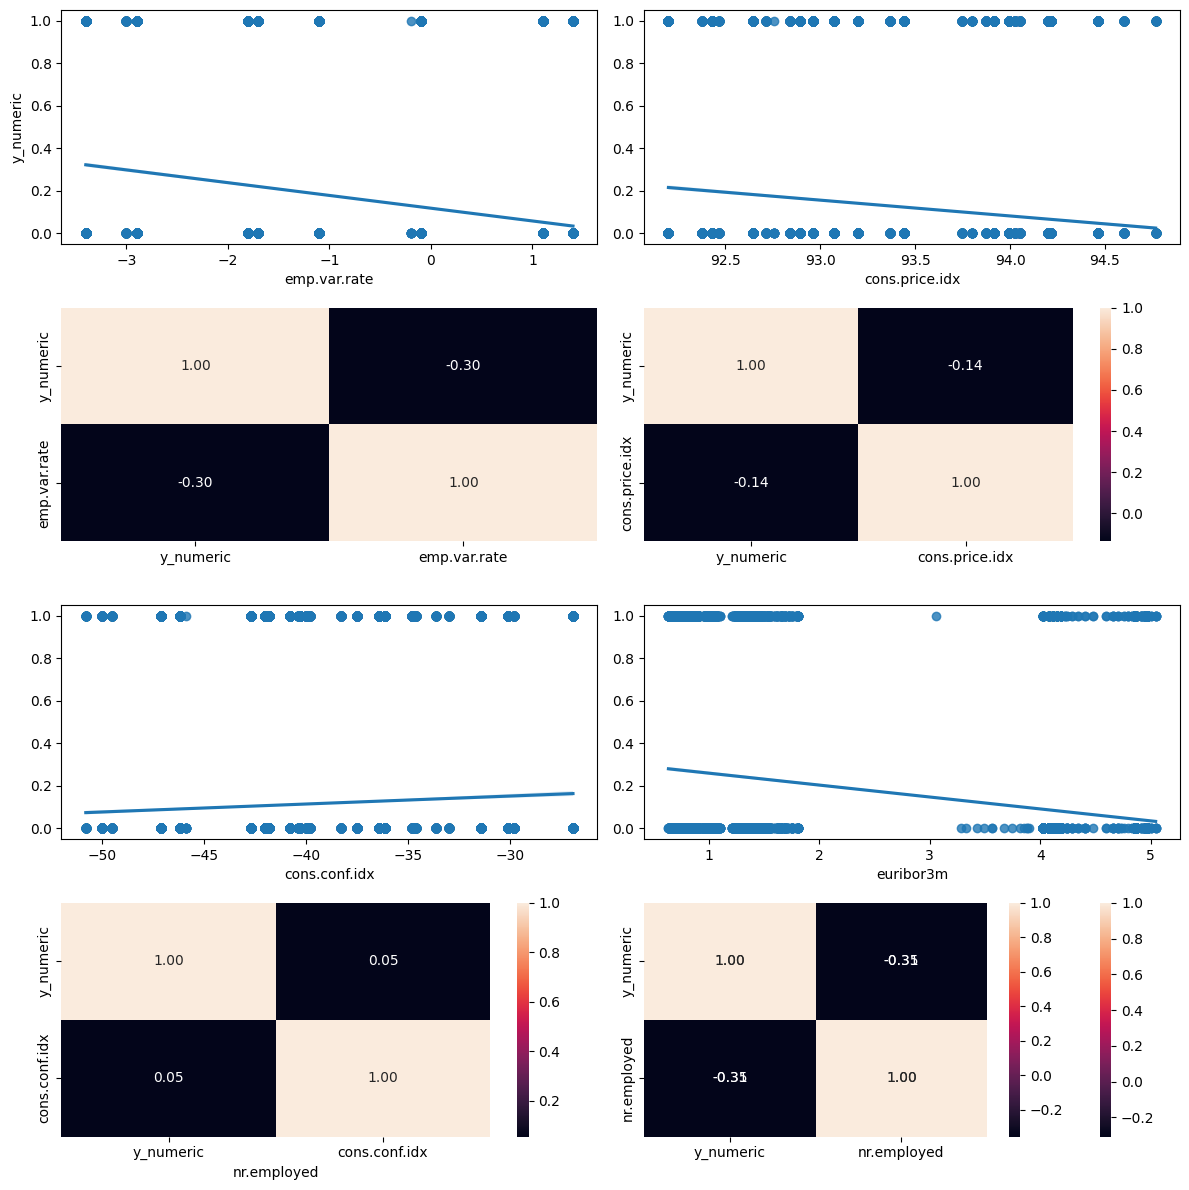

In [ ]:
fig, axis = plt.subplots(4, 2, figsize = (12, 12))


sns.regplot(ax = axis[0, 0], data = ds, x = "emp.var.rate", y = "y_numeric")
sns.heatmap(ds[["y_numeric", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = ds, x = "cons.price.idx", y = "y_numeric").set(ylabel=None)
sns.heatmap(ds[["y_numeric", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = ds, x = "cons.conf.idx", y = "y_numeric").set(ylabel=None)
sns.heatmap(ds[["y_numeric", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = ds, x = "euribor3m", y = "y_numeric").set(ylabel=None)
sns.heatmap(ds[["y_numeric", "euribor3m"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

sns.regplot(ax = axis[3, 0], data = ds, x = "nr.employed", y = "y_numeric").set(ylabel=None)
sns.heatmap(ds[["y_numeric", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])



plt.tight_layout()

plt.show()


In [ ]:
ds["y_numeric"] = ds["y"].map({"yes": 1, "no": 0})  # Convertir a numérico

correlation_with_y = ds[["y_numeric", "nr.employed", "cons.conf.idx", "euribor3m", "cons.price.idx", "emp.var.rate"]].corr()

print(correlation_with_y["y_numeric"].sort_values(ascending=False))

y_numeric         1.000000
cons.conf.idx     0.054878
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
nr.employed      -0.354678
Name: y_numeric, dtype: float64


    Conclusión:
    En el caso del grupo de variables numéricas económicas apreciamos que ninguna está directamente relacionada con la varibale predictoria en este punto del análisis. A continuación analizo la correlación entre ellas.

- **COORRELACIONES ENTRE PROPIAS VARIABLES NUMÉRICAS ECONÓMICAS**

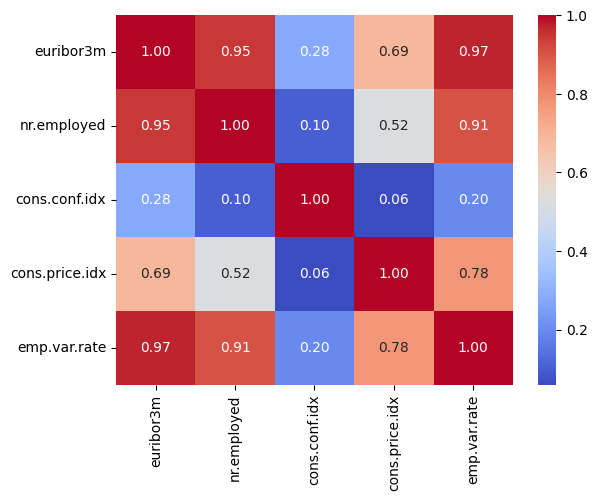

In [ ]:
correlation_matrix = ds[["euribor3m","nr.employed", "cons.conf.idx", "cons.price.idx", "emp.var.rate"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

    Conclusión:
    Creo que igualmente es interesante para el modelo incluir una variable de tipo económico debido a la naturaleza del análisis- La variable "euribor3m" es de todas formas importante para este ya que es una característica bastante relacionada con la economia e indica la rentabilidad del deósito. Decido mantenerla y eliminar el resto.
    

In [ ]:
ds.drop(columns = ["nr.employed", "cons.conf.idx", "cons.price.idx", "emp.var.rate"], inplace = True)

- **ANÁLISIS CATEGÓRICO - CATEGÓRICO**

- **Analisis de coorrelacion: NUMÉRICO - CATEGÓRICO**

TEORIA

IMPLICA:

- FACTORIZACIÓN DE VARIABLES CATEGORICAS ; ¿Porque? ¿Qué es la factorización? ¿Cómos e hace el cálculo? ¿Cuándo se usa?

In [ ]:

ds["job"] = pd.factorize(ds["job"])[0]
ds["marital"] = pd.factorize(ds["marital"])[0]
ds["education"] = pd.factorize(ds["education"])[0]
ds["housing"] = pd.factorize(ds["housing"])[0]
ds["loan"] = pd.factorize(ds["loan"])[0]
ds["contact"] = pd.factorize(ds["contact"])[0]
ds["poutcome"] = pd.factorize(ds["poutcome"])[0]
ds["y"] = pd.factorize(ds["y"])[0]

    Conclusión:

### **PASO 5: INGENIERÍA DE CARACTERÍSTICAS**

##### **ANÁLISIS DE OUTLIERS**

- **TABLA DEL ANÁLISIS DESCRIPTIVO**

In [ ]:
ds.describe()

NameError: name 'ds' is not defined

    Conclusión:

- **GRÁFICOS DE VARIABLES NUMÉRICAS**

    Conclusión:

- **GRÁFICOS DE VARIABLES CATEGÓRICAS**

In [ ]:
plt.figure(figsize=(10,7))

sns.boxplot(x=total_data['room_type'], y=total_data['price'])
plt.title("Comportamiento de outliers respecto al precio")

    Conclusión:

##### **LIMPIEZA DE OUTLIERS**

In [ ]:
ds[ds["price"] > 1000]

In [ ]:
ds[ds["minimum_nights"] >5].shape

In [ ]:
availability_365_stats = total_data["availability_365"].describe()

are_iqr = availability_365_stats["75%"] - availability_365_stats["25%"]
upper_limit = availability_365_stats["75%"] + 1.5 * are_iqr
lower_limit = availability_365_stats["25%"] - 1.5 * are_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(are_iqr, 2)}")

total_data[total_data["availability_365"] < 180]

    Conclusión:

##### **ESCALADO DE VALORES**

In [ ]:
''''num_variables = ["room_type_n", "minimum_nights","availability_365","neighbourhood_group_n"]

X = total_data.drop("price", axis = 1)[num_variables]
y = total_data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()''''

    Conclusión:

##### **NORMALIZACIÓN**

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)


X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

    Conclusión:

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12556,40,3,0,3,1,1,0,0,2,0,94,2,999,0,0,1.4,93.918,-42.7,4.960,5228.1
35451,31,2,0,6,0,0,0,1,0,0,116,4,999,0,0,-1.8,92.893,-46.2,1.244,5099.1
30592,59,5,0,0,0,0,0,1,0,0,13,6,999,1,1,-1.8,92.893,-46.2,1.354,5099.1
17914,43,0,2,3,0,1,0,1,2,1,94,5,999,0,0,1.4,93.918,-42.7,4.961,5228.1
3315,39,2,1,1,1,0,0,0,0,3,344,2,999,0,0,1.1,93.994,-36.4,4.860,5191.0


##### **ESCALADO MINIMO-MAXIMO**

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train)


X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns=num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index,  columns=num_variables)

X_train_scal.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,previous,previous,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12556,0.283951,0.272727,0.000000,0.428571,0.5,0.5,0.0,0.0,0.222222,0.00,0.019113,0.018182,1.0,0.000000,0.0,1.000000,0.669135,0.338912,0.980730,1.000000
35451,0.172840,0.181818,0.000000,0.857143,0.0,0.0,0.0,1.0,0.000000,0.00,0.023587,0.054545,1.0,0.000000,0.0,0.333333,0.269680,0.192469,0.138291,0.512287
30592,0.518519,0.454545,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.00,0.002643,0.090909,1.0,0.142857,0.5,0.333333,0.269680,0.192469,0.163228,0.512287
17914,0.320988,0.000000,0.666667,0.428571,0.0,0.5,0.0,1.0,0.222222,0.25,0.019113,0.072727,1.0,0.000000,0.0,1.000000,0.669135,0.338912,0.980957,1.000000
3315,0.271605,0.181818,0.333333,0.142857,0.5,0.0,0.0,0.0,0.000000,0.75,0.069947,0.018182,1.0,0.000000,0.0,0.937500,0.698753,0.602510,0.958059,0.859735


SLIP TESTEO MODELO

?¿ NO SE DONDE VA ESTA PARTE DEL CODIGO ?¿

In [ ]:
num_variables=["age","job","marital","education","default","housing","loan","contact","month","day_of_week","duration","previous","previous","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
X = ds.drop("y", axis = 1)
y = ds["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

### **PASO 6: SELECCIÓN DE CARACTERISTICAS**

In [ ]:
selection_model = SelectKBest(f_classif, k = 4)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test_scal.columns.values[ix])

X_train_sel.head()
X_test_sel.head() 

,duration,previous,euribor3m,nr.employed
0,0.075437,1.0,0.150759,0.512287
1,0.057950,1.0,0.958059,0.859735
2,0.010573,1.0,0.153933,0.512287
3,0.072184,1.0,0.982317,1.000000
4,0.038430,1.0,0.981410,1.000000


LINEAR REGRASSION

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_sel, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_sel)
y_pred

array([0, 0, 0, ..., 0, 1, 0], shape=(8238,))

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)
#CUAN EXACTO ES EL MODELO: PRUEBA CON Y REALES Y Y PRED(PREDICORIAS)

0.9061665452779801

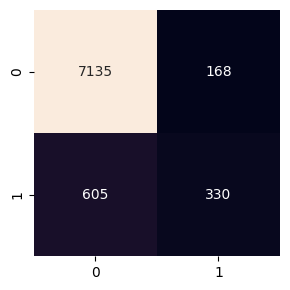

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

titanic_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(titanic_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()